# SPOT THE MASK
_KTM, 19 Aug 2020_

In [2]:
# fastai imports
from fastai.vision import *

# custom imports
import os

## 1. Data

In [5]:
os.listdir('./')

['.git', '.gitignore', '.ipynb_checkpoints', 'data', 'spot_the_mask_v01.ipynb', 'spot_the_mask_v02.ipynb']


In [2]:
!ls {'./data/'}

images	images.zip  sample_sub_v2.csv  train_labels.csv


In [5]:
!ls {'./data/images/'}

aadawlxbmapqrblgxyzarhjasgiobu.png   mmyzpsubrlmncomjiljweurkyxwtoq.jpg
aajjpjqlqyywucvkzuwsqpbxxyqiih.jpg   moaxnhyidgejhztzrwsgqdzdrrdpbn.jpg
aalpjcukdicembbvukraexfyxkmsnd.jpg   mpcirrtdelghdkqkypfmskbkryumyk.png
aamrmacbsylkbahdhvcfmeqvgyjopc.jpg   mpiyfegdfcjyqdhxblcjlskygxegdd.jpg
aaqrdyfhhsdwjiykofhsexfdamezlk.jpg   mpqmbhaysqzjmfibhwygwngzfopnfu.jpg
ablhcfuyqnkcanakxmpreufqycpgqs.jpg   mragkclknhcnqosdkuvchpjdrjofso.jpg
abpxvdfyhaaohzcrngcucmhffwizxs.jpg   mrytehdxapzyymznjhvbvkhutalisi.jpg
acbcufgusmnchzbuiuxluaizkqvobc.jpg   mryzptvsvgrisoimspvdugeepobqkk.jpg
aciificrosunmvbdqgkbtchpzawkkq.jpg   mshiwmufbboxbmqnxxnkvduycxqxpw.jpg
aclkjfvackiieiznzfcwienplielrj.jpg   msiigywzihqnqtrdcsdkdzpgeyylyl.jpg
acrbwwcknudlvwfjvfbreeatynhfov.jpg   mthrpqxgvwfdlksknvymngogpppnhp.jpg
aelkivmayxgsdjosiibfgmkvfrjvjk.jpg   mtjmylupexliggdaqvuamtttjbizro.jpg
aelzzshpfxerelefnkatpczktuxjln.jpg   mtkmqoxjnmplockjwdilejfsrxcbvy.jpg
aeoznpwjxjsawhiousrpjrxmeltnkw.jpg   mtqtvazpnlsfwlreocalqffwoso

In [7]:
path = Path('./data')

In [41]:
data = ImageDataBunch.from_csv(path,
    folder='images',
    csv_labels='train_labels.csv',
    valid_pct=0.2,
    fn_col='image',
    label_col='target',
    header='infer',
    no_check=False,
    ds_tfms=None,
    size=24)

In [42]:
ds = data.train_ds

## 2. Explore Images and Labels

In [43]:
img, label = ds[34]
img

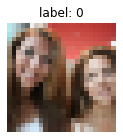

In [ ]:
img.show(figsize=(2,2), title='label: ' + str(label))

In [ ]:
img.rotate(35).show()

## Training

In [37]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [38]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/kth/anaconda3/envs/fast_mask/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/kth/anaconda3/envs/fast_mask/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "/home/kth/anaconda3/envs/fast_mask/lib/python3.7/site-packages/fastai/torch_core.py", line 127, in data_collate
    return torch.utils.data.dataloader.default_collate(to_data(batch))
  File "/home/kth/anaconda3/envs/fast_mask/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 79, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/home/kth/anaconda3/envs/fast_mask/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 79, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/home/kth/anaconda3/envs/fast_mask/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 55, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 523 and 640 in dimension 2 at /opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/TH/generic/THTensor.cpp:612
